In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [2]:
code_directory = '/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/code'
os.chdir(code_directory)
base_path_data = '../Data'
results_path = '../results'

# Load data
hup_region_features = pd.read_csv(os.path.join(results_path, 'ge_go_hup_region_features.csv'))
mni_region_features = pd.read_csv(os.path.join(results_path, 'mni_region_features.csv'))

# Add site labels
hup_region_features['site'] = 'HUP'
mni_region_features['site'] = 'MNI'

# Combine datasets
region_features = pd.concat([hup_region_features, mni_region_features], ignore_index=True)

In [3]:
# Define feature columns
feature_columns = [
    'deltaRel_mean', 'thetaRel_mean', 'alphaRel_mean', 
    'betaRel_mean', 'gammaRel_mean', 'entropy_1min_mean', 
    'entropy_fullts_mean'
]

# Aggregate features per patient
patient_features = region_features.groupby(['patient_id', 'site'])[feature_columns].mean().reset_index()

# Create labels
y = patient_features['site'].map({'HUP': 1, 'MNI': 0})

# Prepare train/test split once
# We'll do model selection via cross-validation on the training set.
X_all = patient_features[feature_columns]

X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, stratify=y, random_state=42
)

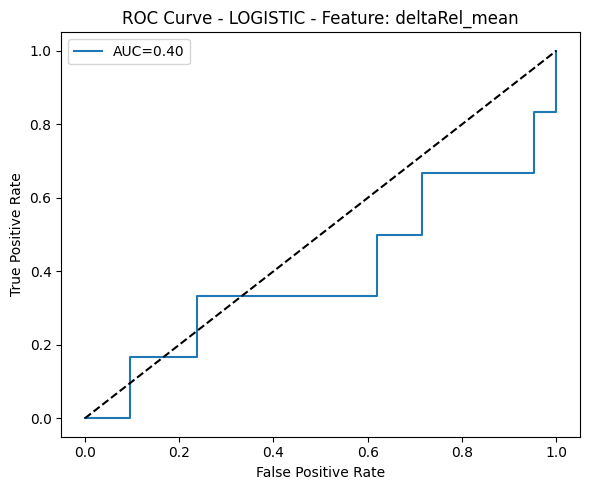

Model: logistic, Feature: deltaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[16  5]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.800000  0.285714  0.666667   0.542857      0.685714
recall      0.761905  0.333333  0.666667   0.547619      0.666667
f1-score    0.780488  0.307692  0.666667   0.544090      0.675422
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


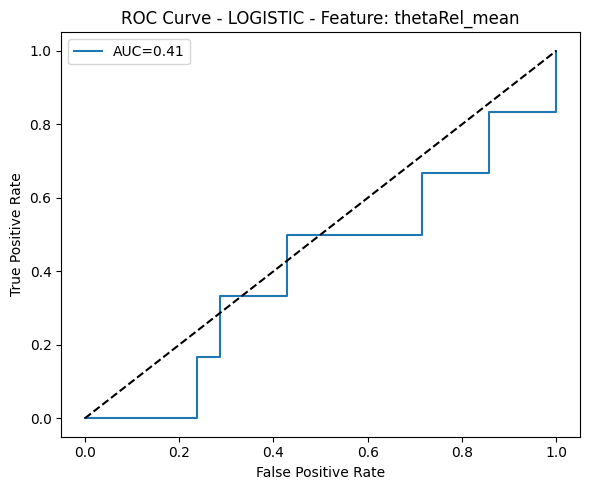

Model: logistic, Feature: thetaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[13  8]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.764706  0.200000  0.555556   0.482353      0.639216
recall      0.619048  0.333333  0.555556   0.476190      0.555556
f1-score    0.684211  0.250000  0.555556   0.467105      0.587719
support    21.000000  6.000000  0.555556  27.000000     27.000000
--------------------------------------------------


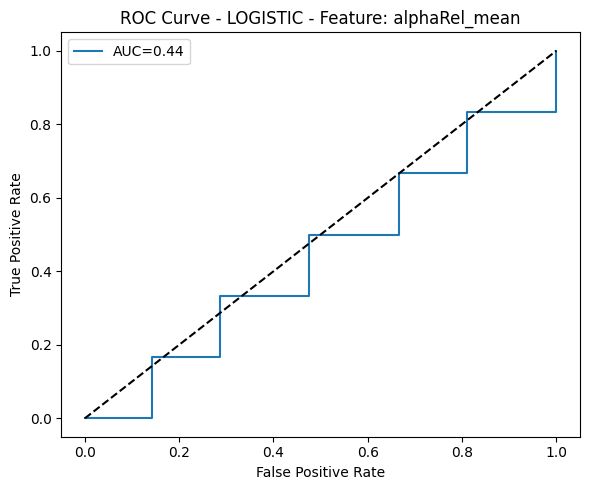

Model: logistic, Feature: alphaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[11 10]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.733333  0.166667  0.481481   0.450000      0.607407
recall      0.523810  0.333333  0.481481   0.428571      0.481481
f1-score    0.611111  0.222222  0.481481   0.416667      0.524691
support    21.000000  6.000000  0.481481  27.000000     27.000000
--------------------------------------------------


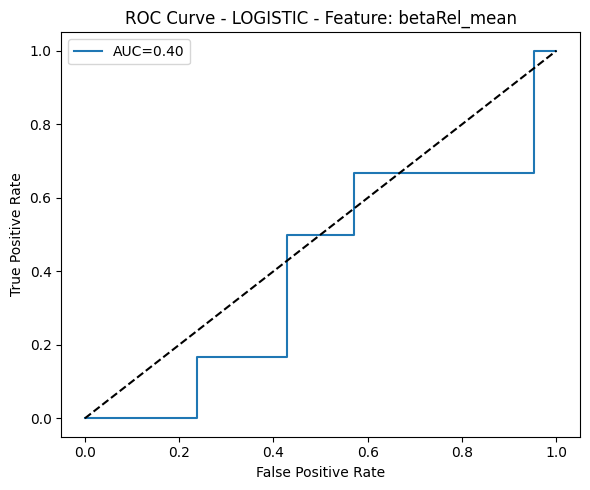

Model: logistic, Feature: betaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[12  9]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.750000  0.181818  0.518519   0.465909      0.623737
recall      0.571429  0.333333  0.518519   0.452381      0.518519
f1-score    0.648649  0.235294  0.518519   0.441971      0.556792
support    21.000000  6.000000  0.518519  27.000000     27.000000
--------------------------------------------------


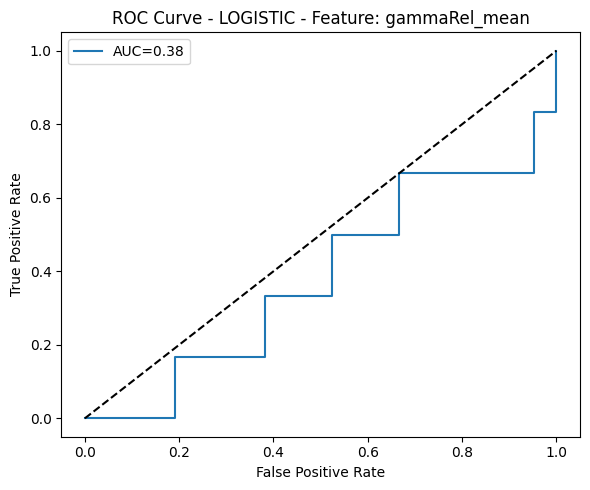

Model: logistic, Feature: gammaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[10 11]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.714286  0.153846  0.444444   0.434066      0.589744
recall      0.476190  0.333333  0.444444   0.404762      0.444444
f1-score    0.571429  0.210526  0.444444   0.390977      0.491228
support    21.000000  6.000000  0.444444  27.000000     27.000000
--------------------------------------------------


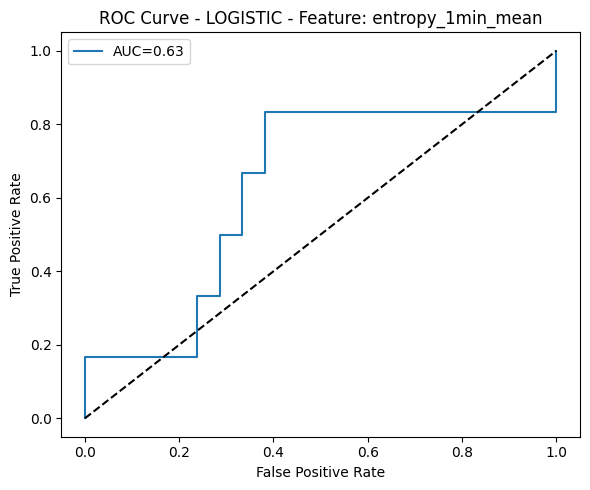

Model: logistic, Feature: entropy_1min_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[15  6]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.789474  0.250000   0.62963   0.519737      0.669591
recall      0.714286  0.333333   0.62963   0.523810      0.629630
f1-score    0.750000  0.285714   0.62963   0.517857      0.646825
support    21.000000  6.000000   0.62963  27.000000     27.000000
--------------------------------------------------


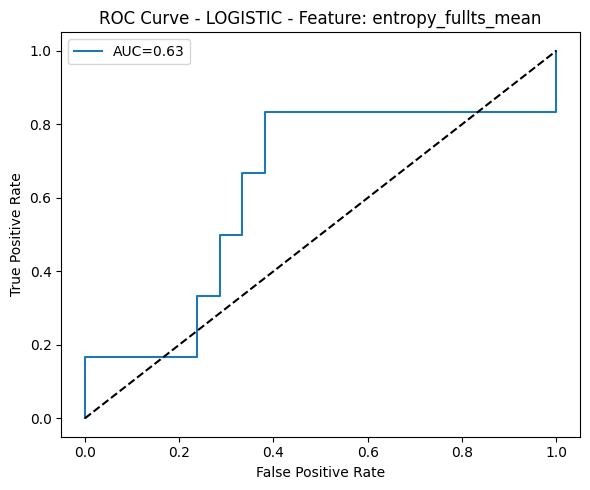

Model: logistic, Feature: entropy_fullts_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced'}
Confusion Matrix:
 [[15  6]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.789474  0.250000   0.62963   0.519737      0.669591
recall      0.714286  0.333333   0.62963   0.523810      0.629630
f1-score    0.750000  0.285714   0.62963   0.517857      0.646825
support    21.000000  6.000000   0.62963  27.000000     27.000000
--------------------------------------------------


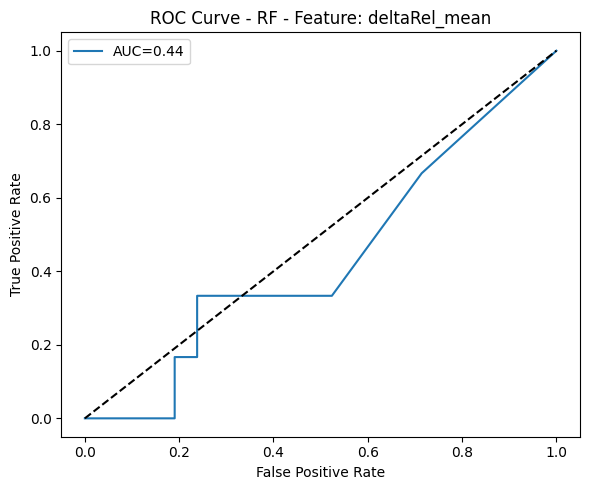

Model: rf, Feature: deltaRel_mean
Best Params: {'class_weight': None, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix:
 [[19  2]
 [ 6  0]]
Classification Report:
                  MNI  HUP  accuracy  macro avg  weighted avg
precision   0.760000  0.0  0.703704   0.380000      0.591111
recall      0.904762  0.0  0.703704   0.452381      0.703704
f1-score    0.826087  0.0  0.703704   0.413043      0.642512
support    21.000000  6.0  0.703704  27.000000     27.000000
--------------------------------------------------


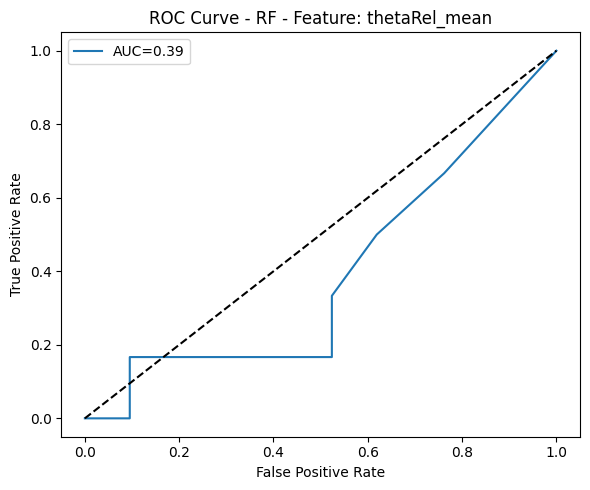

Model: rf, Feature: thetaRel_mean
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
Confusion Matrix:
 [[17  4]
 [ 5  1]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.772727  0.200000  0.666667   0.486364      0.645455
recall      0.809524  0.166667  0.666667   0.488095      0.666667
f1-score    0.790698  0.181818  0.666667   0.486258      0.655391
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


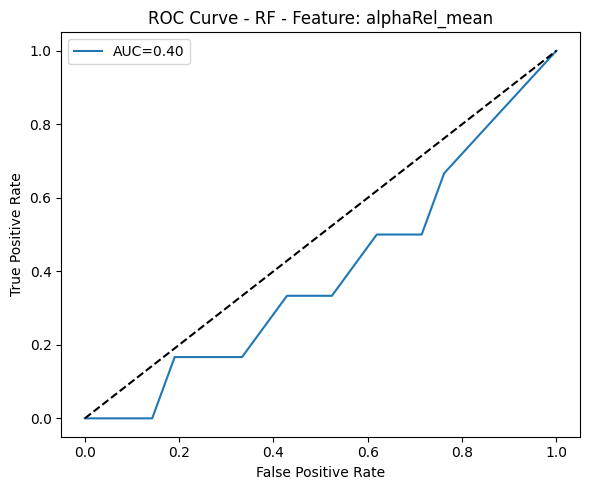

Model: rf, Feature: alphaRel_mean
Best Params: {'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 200}
Confusion Matrix:
 [[15  6]
 [ 5  1]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.750000  0.142857  0.592593   0.446429      0.615079
recall      0.714286  0.166667  0.592593   0.440476      0.592593
f1-score    0.731707  0.153846  0.592593   0.442777      0.603294
support    21.000000  6.000000  0.592593  27.000000     27.000000
--------------------------------------------------


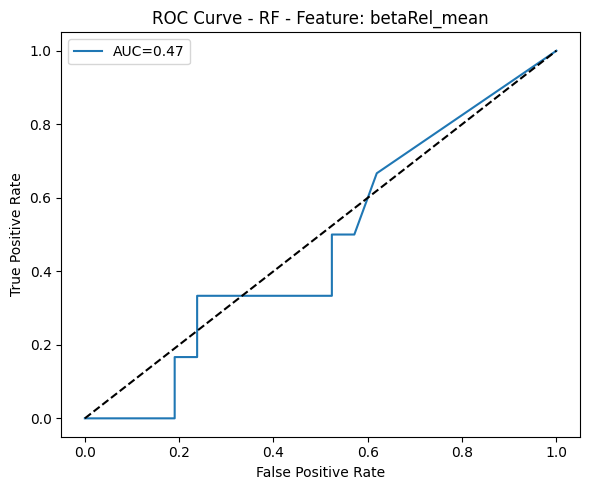

Model: rf, Feature: betaRel_mean
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
Confusion Matrix:
 [[16  5]
 [ 5  1]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.761905  0.166667   0.62963   0.464286       0.62963
recall      0.761905  0.166667   0.62963   0.464286       0.62963
f1-score    0.761905  0.166667   0.62963   0.464286       0.62963
support    21.000000  6.000000   0.62963  27.000000      27.00000
--------------------------------------------------


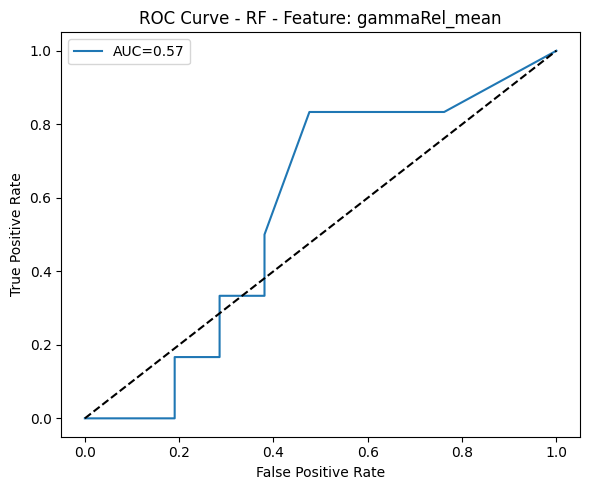

Model: rf, Feature: gammaRel_mean
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
Confusion Matrix:
 [[15  6]
 [ 5  1]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.750000  0.142857  0.592593   0.446429      0.615079
recall      0.714286  0.166667  0.592593   0.440476      0.592593
f1-score    0.731707  0.153846  0.592593   0.442777      0.603294
support    21.000000  6.000000  0.592593  27.000000     27.000000
--------------------------------------------------


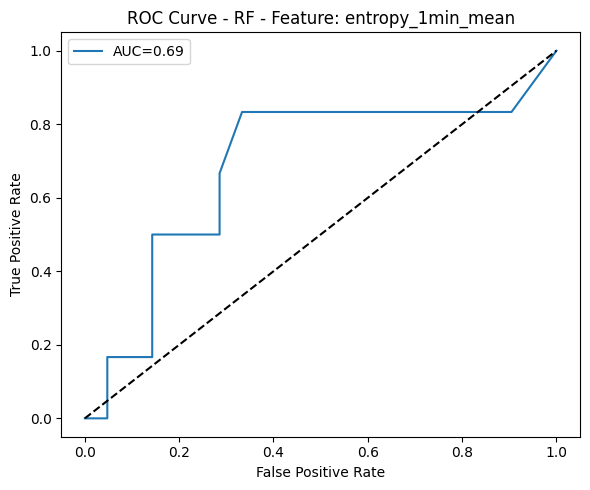

Model: rf, Feature: entropy_1min_mean
Best Params: {'class_weight': None, 'max_depth': 5, 'n_estimators': 200}
Confusion Matrix:
 [[18  3]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.818182  0.400000  0.740741   0.609091      0.725253
recall      0.857143  0.333333  0.740741   0.595238      0.740741
f1-score    0.837209  0.363636  0.740741   0.600423      0.731971
support    21.000000  6.000000  0.740741  27.000000     27.000000
--------------------------------------------------


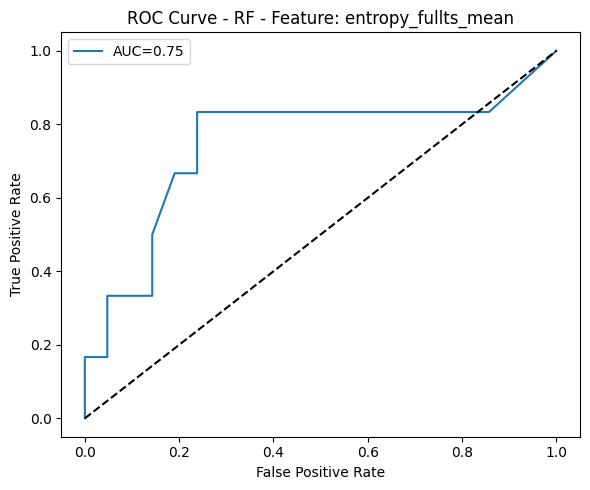

Model: rf, Feature: entropy_fullts_mean
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 200}
Confusion Matrix:
 [[13  8]
 [ 1  5]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.928571  0.384615  0.666667   0.656593      0.807692
recall      0.619048  0.833333  0.666667   0.726190      0.666667
f1-score    0.742857  0.526316  0.666667   0.634586      0.694737
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


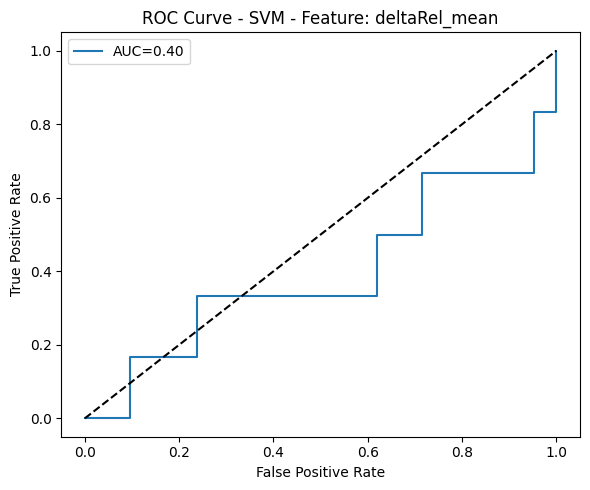

Model: svm, Feature: deltaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Confusion Matrix:
 [[17  4]
 [ 5  1]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.772727  0.200000  0.666667   0.486364      0.645455
recall      0.809524  0.166667  0.666667   0.488095      0.666667
f1-score    0.790698  0.181818  0.666667   0.486258      0.655391
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


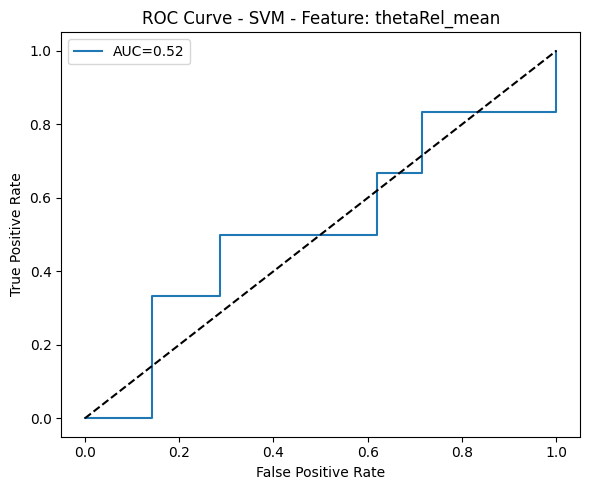

Model: svm, Feature: thetaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Confusion Matrix:
 [[ 8 13]
 [ 3  3]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.727273  0.187500  0.407407   0.457386      0.607323
recall      0.380952  0.500000  0.407407   0.440476      0.407407
f1-score    0.500000  0.272727  0.407407   0.386364      0.449495
support    21.000000  6.000000  0.407407  27.000000     27.000000
--------------------------------------------------


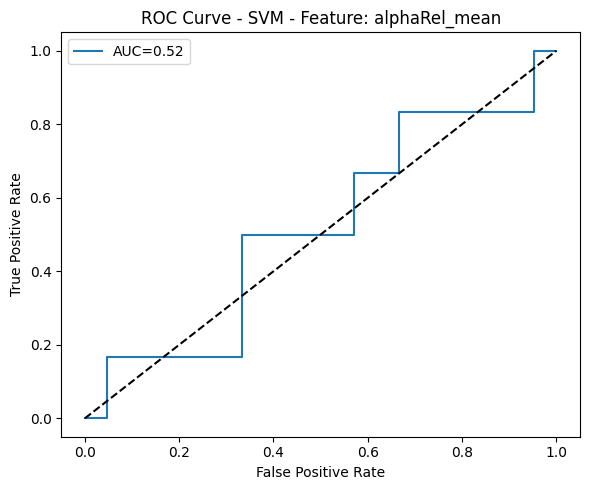

Model: svm, Feature: alphaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Confusion Matrix:
 [[ 7 14]
 [ 3  3]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.700000  0.176471   0.37037   0.438235      0.583660
recall      0.333333  0.500000   0.37037   0.416667      0.370370
f1-score    0.451613  0.260870   0.37037   0.356241      0.409225
support    21.000000  6.000000   0.37037  27.000000     27.000000
--------------------------------------------------


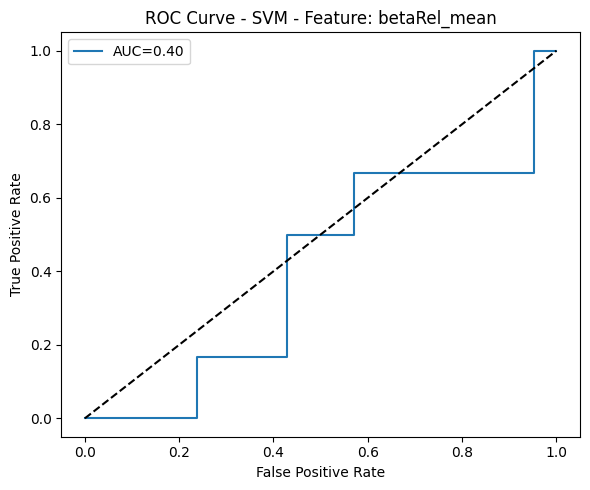

Model: svm, Feature: betaRel_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Confusion Matrix:
 [[12  9]
 [ 4  2]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.750000  0.181818  0.518519   0.465909      0.623737
recall      0.571429  0.333333  0.518519   0.452381      0.518519
f1-score    0.648649  0.235294  0.518519   0.441971      0.556792
support    21.000000  6.000000  0.518519  27.000000     27.000000
--------------------------------------------------


/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tereza/anaconda3/envs/cnt_gen/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

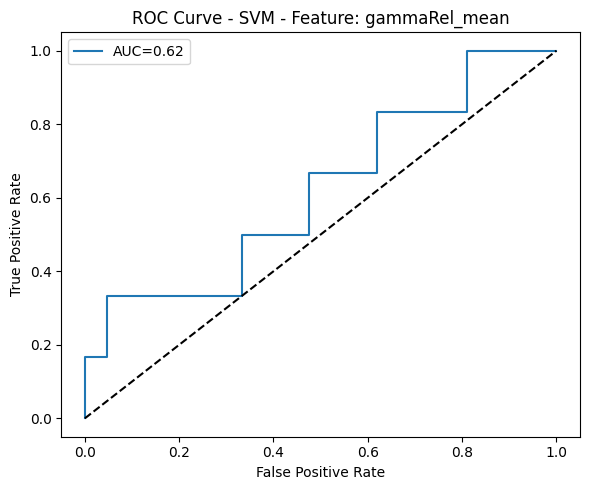

Model: svm, Feature: gammaRel_mean
Best Params: {'C': 1.0, 'class_weight': None, 'kernel': 'linear'}
Confusion Matrix:
 [[21  0]
 [ 6  0]]
Classification Report:
                  MNI  HUP  accuracy  macro avg  weighted avg
precision   0.777778  0.0  0.777778   0.388889      0.604938
recall      1.000000  0.0  0.777778   0.500000      0.777778
f1-score    0.875000  0.0  0.777778   0.437500      0.680556
support    21.000000  6.0  0.777778  27.000000     27.000000
--------------------------------------------------


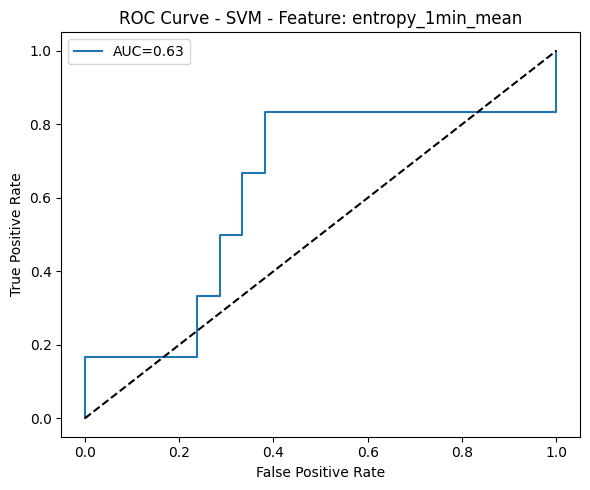

Model: svm, Feature: entropy_1min_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Confusion Matrix:
 [[15  6]
 [ 3  3]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.833333  0.333333  0.666667   0.583333      0.722222
recall      0.714286  0.500000  0.666667   0.607143      0.666667
f1-score    0.769231  0.400000  0.666667   0.584615      0.687179
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


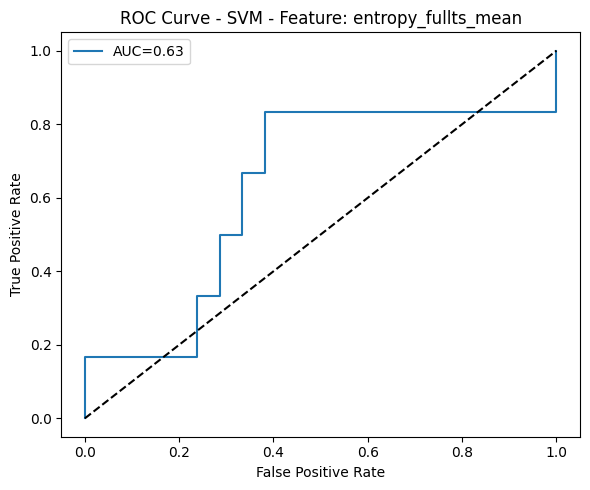

Model: svm, Feature: entropy_fullts_mean
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Confusion Matrix:
 [[15  6]
 [ 3  3]]
Classification Report:
                  MNI       HUP  accuracy  macro avg  weighted avg
precision   0.833333  0.333333  0.666667   0.583333      0.722222
recall      0.714286  0.500000  0.666667   0.607143      0.666667
f1-score    0.769231  0.400000  0.666667   0.584615      0.687179
support    21.000000  6.000000  0.666667  27.000000     27.000000
--------------------------------------------------


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Set working directory and paths as needed
code_directory = '/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/code'
os.chdir(code_directory)
base_path_data = '../Data'
results_path = '../results'

# Load data
hup_region_features = pd.read_csv(os.path.join(results_path, 'ge_go_hup_region_features.csv'))
mni_region_features = pd.read_csv(os.path.join(results_path, 'mni_region_features.csv'))

# Add site labels
hup_region_features['site'] = 'HUP'
mni_region_features['site'] = 'MNI'

# Combine datasets
region_features = pd.concat([hup_region_features, mni_region_features], ignore_index=True)

# Define feature columns
feature_columns = [
    'deltaRel_mean', 'thetaRel_mean', 'alphaRel_mean', 
    'betaRel_mean', 'gammaRel_mean', 'entropy_1min_mean', 
    'entropy_fullts_mean'
]

# Aggregate features per patient
patient_features = region_features.groupby(['patient_id', 'site'])[feature_columns].mean().reset_index()

# Create labels
y = patient_features['site'].map({'HUP': 1, 'MNI': 0})
X = patient_features[feature_columns]

# Train/test split
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define models and parameter grids
model_defs = {
    'logistic': (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.1, 1.0, 10.0],
            'class_weight': ['balanced', None]
        }
    ),
    'rf': (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, None],
            'class_weight': ['balanced', None]
        }
    ),
    'svm': (
        SVC(probability=True),
        {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced', None]
        }
    )
}

def train_and_evaluate_feature(X_train, y_train, X_test, y_test, model_key, feature_name):
    # Use only this one feature
    X_train_feat = X_train[[feature_name]].copy()
    X_test_feat = X_test[[feature_name]].copy()
    
    # Scale the feature
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_feat)
    X_test_scaled = scaler.transform(X_test_feat)
    
    model, param_grid = model_defs[model_key]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Grid search on training data
    grid_search = GridSearchCV(
        model, param_grid, 
        cv=cv, scoring='roc_auc', n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate on the test set
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    y_pred = best_model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=['MNI', 'HUP'], output_dict=True)

    return {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'cm': cm,
        'cr': cr,
        'best_params': grid_search.best_params_
    }

# For each feature and each model, create a separate ROC plot
for model_key in ['logistic', 'rf', 'svm']:
    for feat in feature_columns:
        results = train_and_evaluate_feature(X_train_all, y_train, X_test_all, y_test, model_key, feat)
        plt.figure(figsize=(6, 5))
        plt.plot(results['fpr'], results['tpr'], label=f'AUC={results["auc"]:.2f}')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_key.upper()} - Feature: {feat}')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print confusion matrix and classification report for reference
        print(f"Model: {model_key}, Feature: {feat}")
        print("Best Params:", results['best_params'])
        print("Confusion Matrix:\n", results['cm'])
        print("Classification Report:\n", pd.DataFrame(results['cr']))
        print("-"*50)
